In [2]:
import pandas as pd
import numpy as np
import os 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
fgIndex= pd.read_csv('fear_greed_index.csv')
histData = pd.read_csv('historical_data.csv')

In [7]:
fgIndex.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
fgIndex['value'].unique()

array([30, 15, 40, 24, 11,  8, 36, 44, 54, 31, 42, 35, 55, 71, 67, 74, 63,
       39, 33, 37, 41, 38, 47, 56, 59, 32, 29, 28, 18, 12, 16, 22, 17, 19,
       20, 21, 23, 26, 25, 64, 61, 52, 62, 53, 27, 34, 43, 46, 49, 48, 14,
       13, 51,  9, 10, 65, 69, 58, 50, 57, 60, 68, 66, 76, 75, 78, 77, 70,
       73, 80, 84, 83, 82, 81, 87, 95, 92, 79, 72, 45,  5, 90, 88, 86, 89,
       91, 94, 93,  7,  6])

In [9]:
fgIndex.classification.unique()

array(['Fear', 'Extreme Fear', 'Neutral', 'Greed', 'Extreme Greed'],
      dtype=object)

In [10]:
histData.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [11]:
histData.Coin.unique()

array(['@107', 'AAVE', 'DYDX', 'AIXBT', 'GMX', 'EIGEN', 'HYPE', 'SOL',
       'SUI', 'DOGE', 'ETH', 'kPEPE', 'TRUMP', 'ONDO', 'ENA', 'LINK',
       'XRP', 'S', 'BNB', 'BERA', 'WIF', 'LAYER', 'MKR', 'KAITO', 'IP',
       'JUP', 'USUAL', 'ADA', 'BTC', 'PURR/USDC', 'ZRO', '@7', '@19',
       '@21', '@44', '@48', '@11', '@15', '@46', '@61', '@28', '@45',
       '@9', '@41', '@38', 'kSHIB', 'GRASS', 'TAO', 'AVAX', '@2', '@6',
       '@8', '@10', '@12', '@16', '@17', '@35', '@26', '@24', '@32',
       '@29', '@31', '@33', '@34', '@36', '@37', '@47', '@53', '@74',
       'RUNE', 'CANTO', 'NTRN', 'BLUR', 'ZETA', 'MINA', 'MANTA', 'RNDR',
       'WLD', 'kBONK', 'ALT', 'INJ', 'STG', 'ZEN', 'MAVIA', 'PIXEL',
       'ILV', 'FET', 'STRK', 'CAKE', 'STX', 'ACE', 'PENDLE', 'AR', 'XAI',
       'APE', 'MEME', 'NEAR', 'SEI', 'FTM', 'MYRO', 'BIGTIME', 'IMX',
       'BADGER', 'POLYX', 'OP', 'TNSR', 'MAV', 'TIA', 'MERL', 'TON',
       'PURR', 'ME', 'CRV', 'BRETT', 'CHILLGUY', 'MOODENG', 'VIRTUAL',
       'CO

In [20]:
fgIndex.info

<bound method DataFrame.info of        timestamp  value classification        date
0     1517463000     30           Fear  2018-02-01
1     1517549400     15   Extreme Fear  2018-02-02
2     1517635800     40           Fear  2018-02-03
3     1517722200     24   Extreme Fear  2018-02-04
4     1517808600     11   Extreme Fear  2018-02-05
...          ...    ...            ...         ...
2639  1745818200     54        Neutral  2025-04-28
2640  1745904600     60          Greed  2025-04-29
2641  1745991000     56          Greed  2025-04-30
2642  1746077400     53        Neutral  2025-05-01
2643  1746163800     67          Greed  2025-05-02

[2644 rows x 4 columns]>

In [21]:
histData.info

<bound method DataFrame.info of                                            Account      Coin  Execution Price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010

In [23]:
print("Key columns in trader data:")
print(histData.columns)

print("\n📊 Key columns in sentiment data:")
print(fgIndex.columns)


Key columns in trader data:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

📊 Key columns in sentiment data:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [28]:
histData['Timestamp'] = pd.to_datetime(histData['Timestamp'], unit='ms')
histData['trade_date'] = histData['Timestamp'].dt.date

In [32]:
histData.columns = (
    histData.columns
    .str.strip()                # remove leading/trailing whitespace
    .str.lower()                # convert to lowercase
    .str.replace(r'\s+', '_', regex=True)  # replace whitespace with underscore
    .str.replace(r'[^\w_]', '', regex=True)  # remove non-alphanumeric chars except underscores
)


In [ ]:
histData.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date'],
      dtype='object')

In [42]:
unique = (histData['side'].str.lower() != histData['direction'].str.lower()).sum()

print(unique)

174606


In [43]:
histData.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date'],
      dtype='object')

In [44]:
histData['trade_value_per_token'] = histData['size_usd'] / histData['size_tokens']

In [45]:
histData.trade_value_per_token.head

<bound method NDFrame.head of 0         7.976897
1         7.980000
2         7.985495
3         7.987411
4         7.989691
            ...   
211219    1.100994
211220    1.100998
211221    1.100992
211222    1.101000
211223    1.101003
Name: trade_value_per_token, Length: 211224, dtype: float64>

In [46]:
def sentiment_bucket(val):
    if val <=25:
        return "Extreme Fear"
    elif val <= 50:
        return "Fear"
    elif val<=75:
        return "Greed"
    else:
        return "Extreme Greed"


In [67]:
histData.dtypes

account                        category
coin                           category
execution_price                 float64
size_tokens                     float64
size_usd                        float64
side                           category
timestamp_ist                    object
start_position                  float64
direction                        object
closed_pnl                      float64
transaction_hash                 object
order_id                          int64
crossed                            bool
fee                             float64
trade_id                        float64
timestamp                datetime64[ns]
trade_date                       object
trade_value_per_token           float64
dtype: object

In [68]:
histData.to_csv("clean_histData.csv", index=False)
fgIndex.to_csv("clean_fgIndex.csv", index=False)

In [3]:
clean_hd = pd.read_csv('clean_histData.csv')
clean_fg = pd.read_csv('clean_fgIndex.csv')

In [4]:
clean_fg.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [5]:
clean_hd.timestamp_ist.head

<bound method NDFrame.head of 0         02-12-2024 22:50
1         02-12-2024 22:50
2         02-12-2024 22:50
3         02-12-2024 22:50
4         02-12-2024 22:50
                ...       
211219    25-04-2025 15:35
211220    25-04-2025 15:35
211221    25-04-2025 15:35
211222    25-04-2025 15:35
211223    25-04-2025 15:35
Name: timestamp_ist, Length: 211224, dtype: object>

In [6]:
clean_hd['timestamp_ist'] = clean_hd['timestamp_ist'].str.strip().str[:10]

In [7]:
clean_hd['timestamp_ist'] = pd.to_datetime(clean_hd['timestamp_ist'], format="%d-%M-%Y").dt.date
clean_fg['date'] = pd.to_datetime(clean_fg['date']).dt.date

In [8]:
clean_hd.dtypes

account                   object
coin                      object
execution_price          float64
size_tokens              float64
size_usd                 float64
side                      object
timestamp_ist             object
start_position           float64
direction                 object
closed_pnl               float64
transaction_hash          object
order_id                   int64
crossed                     bool
fee                      float64
trade_id                 float64
timestamp                 object
trade_date                object
trade_value_per_token    float64
dtype: object

In [9]:
clean_fg.dtypes

timestamp          int64
value              int64
classification    object
date              object
dtype: object

In [10]:
merged_df = clean_hd.merge(
    clean_fg[['date', 'value', 'classification']],
    left_on='timestamp_ist',
    right_on='date',
    how='left'
)

In [11]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'trade_value_per_token', 'date', 'value',
       'classification'],
      dtype='object')

In [12]:
merged_df.describe

<bound method NDFrame.describe of                                            account      coin  execution_price  \
0       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9769   
1       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9800   
2       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9855   
3       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9874   
4       0xae5eacaf9c6b9111fd53034a602c192a04e082ed      @107           7.9894   
...                                            ...       ...              ...   
211219  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211220  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211221  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211222  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.1010   
211223  0x72743ae2822edd658c0c50608fd7c5c501b2afbd  FARTCOIN           1.10

In [ ]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'trade_date', 'trade_value_per_token', 'date', 'value',
       'classification'],
      dtype='object')

In [16]:
merged_df.drop(columns=['trade_date', 'date', 'timestamp'], inplace=True)

In [17]:
merged_df.columns

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'trade_value_per_token', 'value', 'classification'],
      dtype='object')

In [32]:
merged_df.to_csv("merged.csv", index=False)

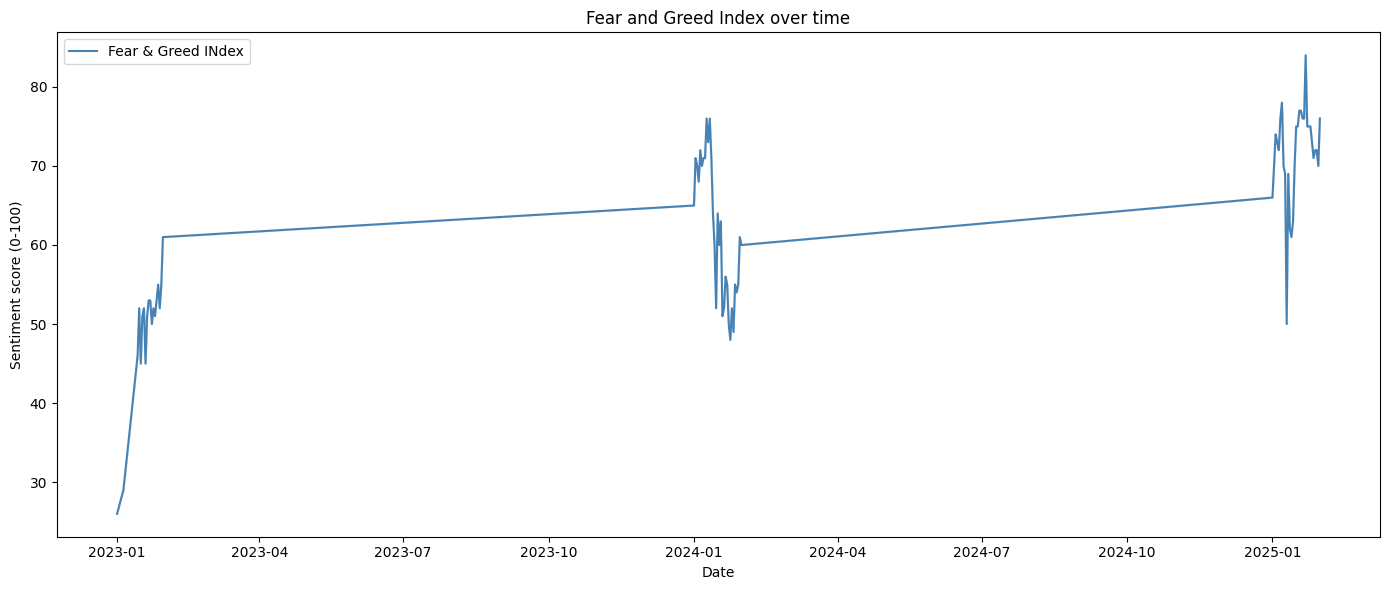

In [19]:
merged_df.sort_values('timestamp_ist', inplace=True)


plt.figure(figsize=(14,6))

sns.lineplot(data=merged_df,x='timestamp_ist', y='value', label= 'Fear & Greed INdex', color='steelblue')
plt.title("Fear and Greed Index over time")
plt.ylabel("Sentiment score (0-100)")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

grouped by date and ssentiment

In [22]:
grouped = merged_df.groupby(['timestamp_ist', 'classification']).agg(
    trade_count=('trade_id', 'count'),
    total_volume_usd=('size_usd', 'sum'),
    unique_traders=('account', 'nunique')
).reset_index()


In [23]:
grouped.head

<bound method NDFrame.head of    timestamp_ist classification  trade_count  total_volume_usd  unique_traders
0     2023-01-01           Fear            3            477.00               1
1     2023-01-05           Fear            9          50005.83               1
2     2023-01-14        Neutral           11         113203.35               1
3     2023-01-15        Neutral            2          10609.95               1
4     2023-01-16        Neutral            3          15348.77               1
..           ...            ...          ...               ...             ...
75    2025-01-27          Greed         2785        7235743.89              20
76    2025-01-28          Greed         3624       32311087.04              22
77    2025-01-29          Greed         5047       39655176.90              17
78    2025-01-30          Greed         2748       18559150.98              16
79    2025-01-31  Extreme Greed         1511        4948183.95              15

[80 rows x 5 columns]

TRADING VOLUME AND ACTIVITY BY SENTIMENT

C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\496791074.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jaysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


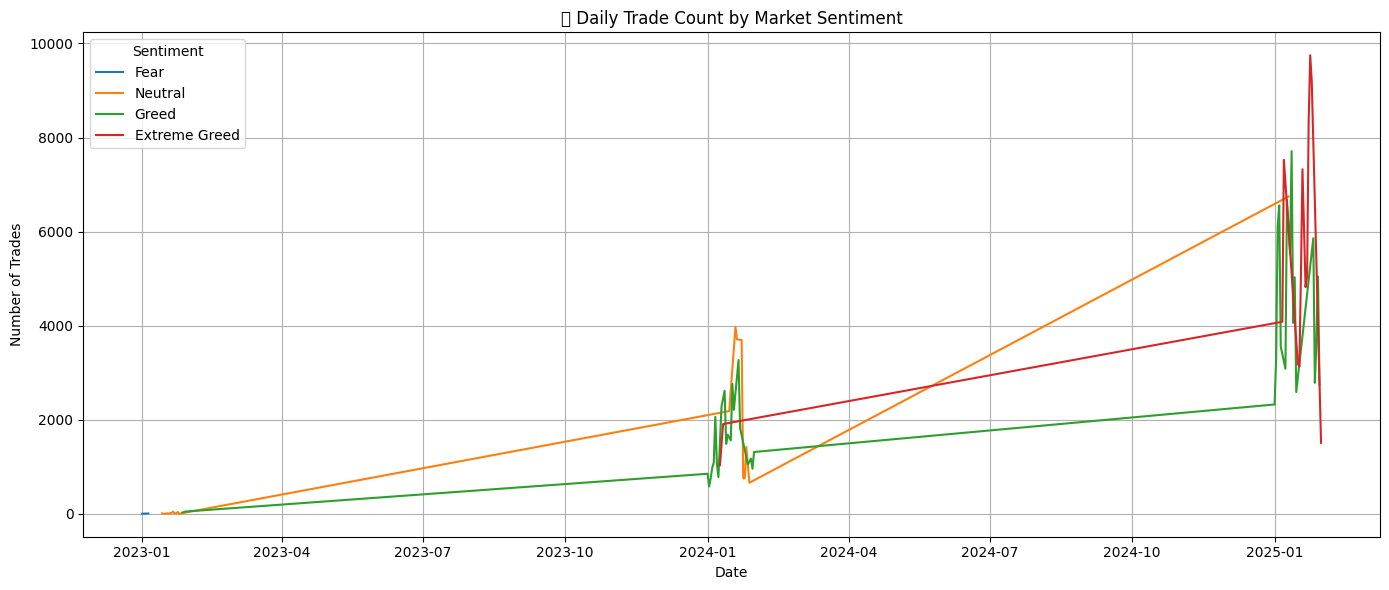

In [26]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='timestamp_ist', y='trade_count', hue='classification')
plt.title("📊 Daily Trade Count by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Number of Trades")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\2410763221.py:8: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jaysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


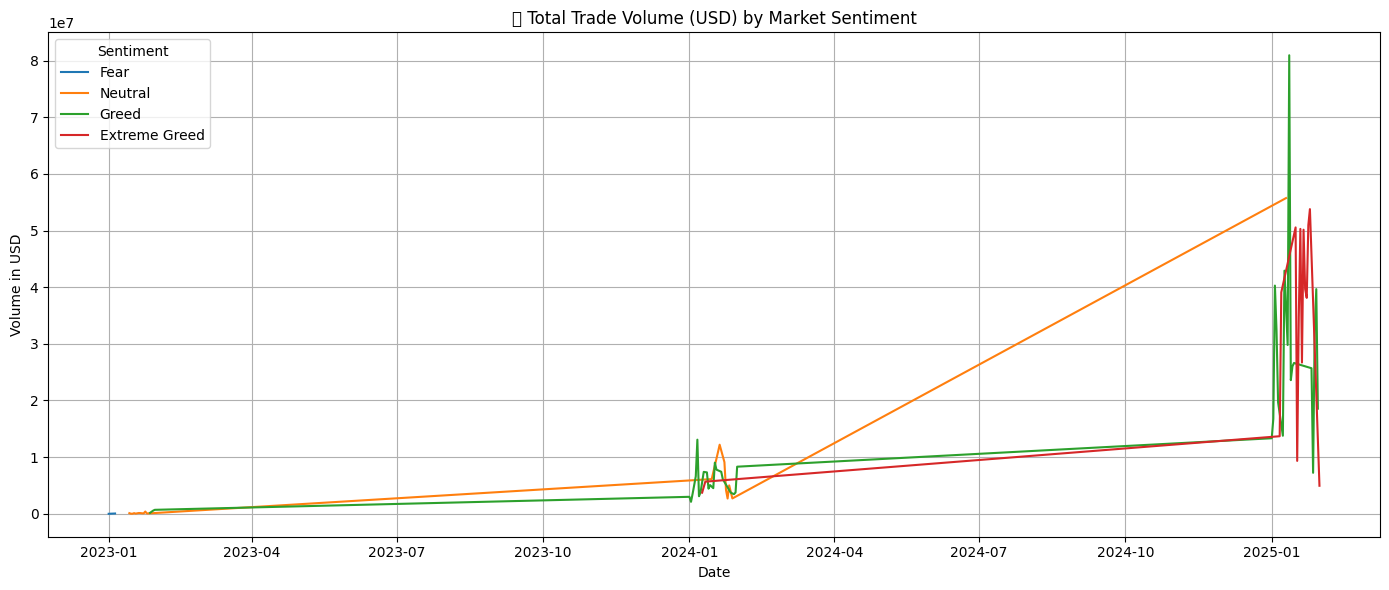

In [27]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=grouped, x='timestamp_ist', y='total_volume_usd', hue='classification')
plt.title("💰 Total Trade Volume (USD) by Market Sentiment")
plt.xlabel("Date")
plt.ylabel("Volume in USD")
plt.legend(title='Sentiment')
plt.grid(True)
plt.tight_layout()
plt.show()


PnL ANALYSIS

In [28]:
pnl_by_sentiment = merged_df.groupby('classification').agg(
    avg_pnl=('closed_pnl', 'mean'),
    median_pnl=('closed_pnl', 'median'),
    total_pnl=('closed_pnl', 'sum'),
    win_rate=('closed_pnl', lambda x: (x > 0).mean() * 100),  # percent of positive PnL
    trade_count=('closed_pnl', 'count')
).reset_index()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\4046303765.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')
C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\4046303765.py:6: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jaysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


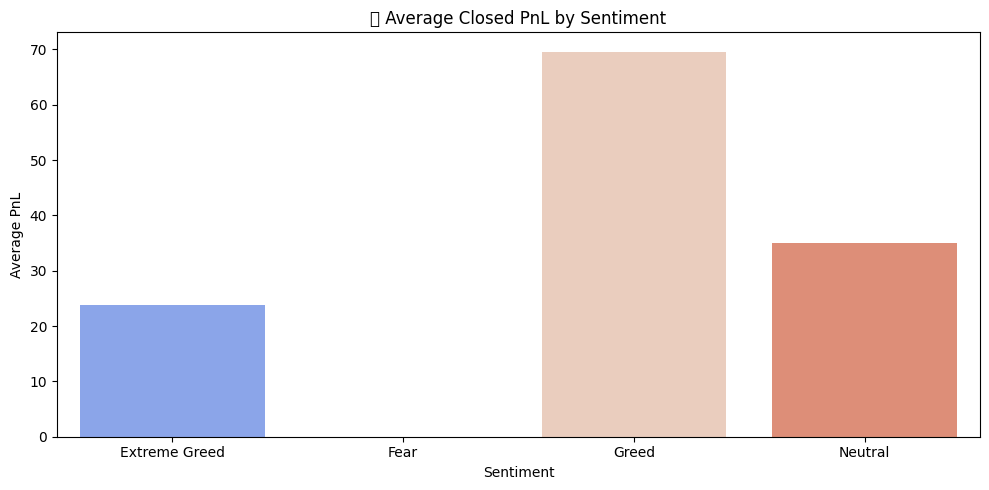

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')
plt.title("Average Closed PnL by Sentiment")
plt.ylabel("Average PnL")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\2848122098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='win_rate', palette='viridis')
C:\Users\jaysu\AppData\Local\Temp\ipykernel_36992\2848122098.py:6: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\jaysu\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


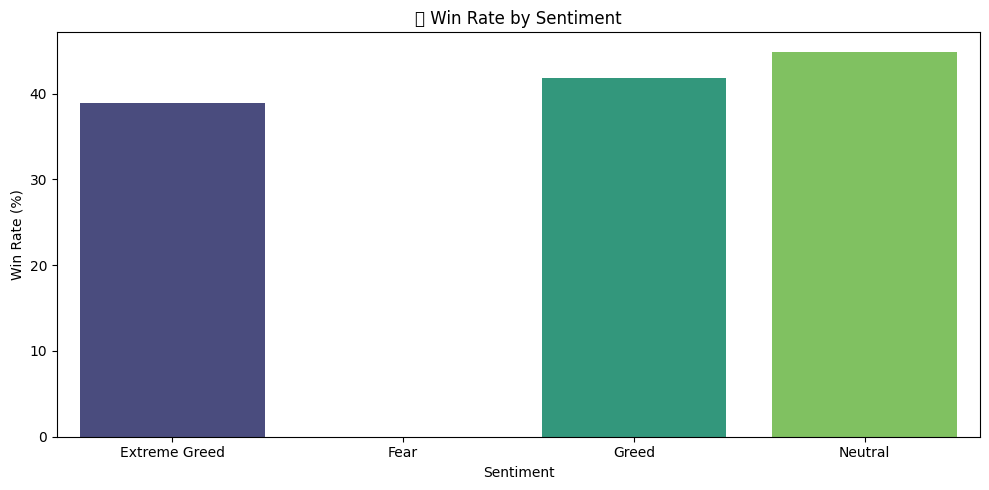

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(data=pnl_by_sentiment, x='classification', y='win_rate', palette='viridis')
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()
